### Decopmose :
1. it is simply findig additive and Multiplicative part of a time series.

#### 1. Additive time series :
 Additive time series = Base level + Tred + Seasonality + Error

#### 2. Multiplicative time series :
 Multiplicative time series = Base level * Trend * Seasonality * Error


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse

In [7]:
# https://raw.githubusercontent.com/selva86/datasets/master/a10.csv
# austrailian drug sales data

drug_data = pd.read_csv('time_series.csv',parse_dates=['date'],index_col='date')
drug_data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [9]:
drug_data.reset_index(inplace=True)

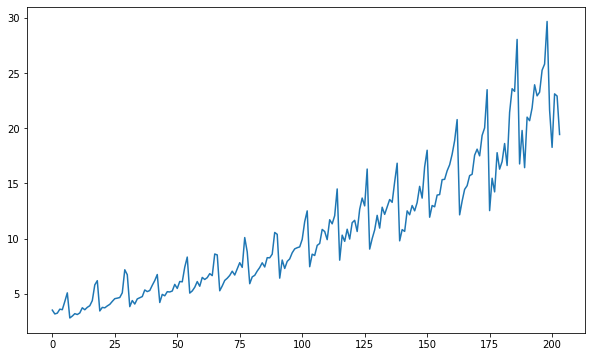

In [12]:
plt.rcParams.update({'figure.figsize':(10,6)})
plt.plot(drug_data['value'])

### Note :
1. here we can see the data has upward trend.
2. there is some little bit of seasonality in this data

In [14]:
# Multiplicative Seasonality
# peroid is frequency what u r calling one peroid of the time series
mul_result = seasonal_decompose(drug_data['value'], model='multiplicative', period=1)

# addative Seasonality
add_result = seasonal_decompose(drug_data['value'], model='additive', period=1)

Text(0.5, 0.98, '\nmultiplicative Decompose')

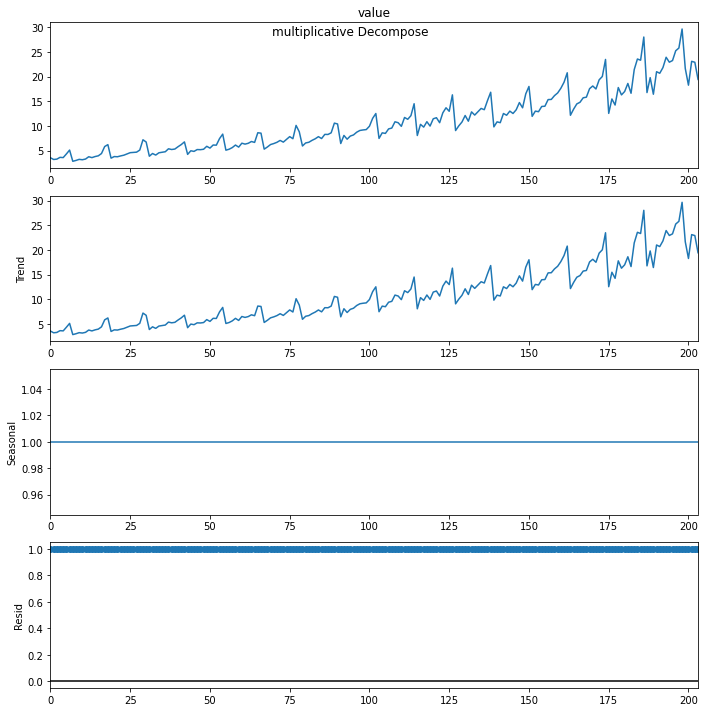

In [15]:
# plot multiplactive 
plt.rcParams.update({'figure.figsize':(10,10)})
mul_result.plot().suptitle('\nmultiplicative Decompose', fontsize=12)

### Note:
1. here we can se both trend and orginal chart are same means the trend component is more promenent.
2. in seasonility the value is 1 means there is no major seasonllity in data
3. the residual or error is 1 so there is less unexpected event

In [19]:
## why seasonility and residual is 1 
new_mul_df = pd.concat([mul_result.seasonal,mul_result.trend,mul_result.resid,add_result.observed],axis=1)
new_mul_df.columnsl = ['seasonility','trend','residual','actual values']
new_mul_df.head()

,seasonal,trend,resid,value
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


#### why seasonility and residual is 1 
1. there is seasonility and residual is 1 not zero because this is a multiplicative series and 
this is base level * trend * seasonility * residual and if it is zero then everthing will be zero

Text(0.5, 0.98, '\nAddative Decompose')

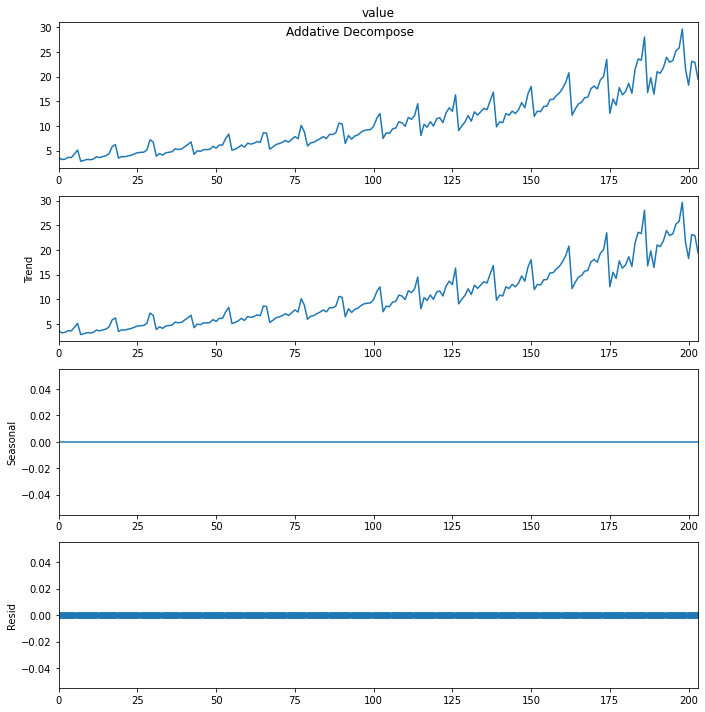

In [16]:
#plot Addative
plt.rcParams.update({'figure.figsize':(10,10)})
add_result.plot().suptitle('\nAddative Decompose', fontsize=12)

### Note:
1. here we can se both trend and orginal chart are same means the trend component is more promenent.
2. in seasonility the value is 0 means there is no major seasonllity in data
3. the residual or error is 0 so there is less unexpected event


In [20]:
## why seasonility and residual is 0
new_add_result = pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed],axis=1)
new_add_result.columns = ['seasonility','trend','residual','actual values']
new_add_result.head()

,seasonility,trend,residual,actual values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


#### why seasonility and residual is 0 :
1. there is seasonility and residual is 0 not 1 because this is a addative series and 
this is base level + trend + seasonility +residual and if it is 1 then data will be change

# ADFULLER test for Stationarity

### Stationarity :
1. is simply our mean and variance is constant or not

In [22]:
from statsmodels.tsa.stattools import adfuller

In [25]:
# adfuller test - null hypothesis : non-stationarity
# if p value < 5% - reject null hypothesis

adfuller_result = adfuller(drug_data.value.values , autolag='AIC')

print(f"ADF statistics: {adfuller_result[0]}")
print(f"p-value: {adfuller_result[1]}")

for key , value in adfuller_result[4].items():
    print('Critial values')
    print(f"{key},{value}")

ADF statistics: 3.145185689306744
p-value: 1.0
Critial values
1%,-3.465620397124192
Critial values
5%,-2.8770397560752436
Critial values
10%,-2.5750324547306476


###  result:
1. here we can see the p value is not less then 5% so we can not reject the null hypothis
2. and series is not stationary
3. and we can not make model from this data we need to make it stationary first